![example](images/director_shot.jpeg)

# Project Title

**Authors:** Ian Butler, Ashli Dougherty, Nicolas Pierce
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

The below cell imports standard packages and also unzips the currently zipped IMDB dataset into ./zippedData

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# from Kevin Rivera
from zipfile import ZipFile
# specifying the zip file name
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall(path='./zippedData')
    print('Done!')

%matplotlib inline

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328
Extracting all the files now...
Done!


In [2]:
conn = sqlite3.Connection('./zippedData/im.db')
cursor = conn.cursor()

In [3]:
testq = """

select
    *
from
    movie_basics

"""

In [4]:
testq_results = pd.read_sql(testq, conn)

In [5]:
testq_results

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [7]:
titles_df = '''
SELECT *

FROM
    movie_basics
'''
titles_df = pd.read_sql(titles_df, conn)
titles_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
ratings_df = '''
SELECT 
    *
FROM
    movie_ratings
'''
ratings_df = pd.read_sql(ratings_df, conn)

ratings_df


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [31]:
movie_ratings = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Thriller%'

ORDER BY avgRating DESC

;


'''

movie_ratings = pd.read_sql(movie_ratings, conn)
movie_ratings

,id,avgRating,title,genres
0,tt9390200,9.4,Dokyala Shot,Thriller
1,tt5354160,9.3,Aynabaji,"Crime,Mystery,Thriller"
2,tt8160864,8.9,Chase,Thriller
3,tt8907970,8.9,Kavacha,Thriller
4,tt2473514,8.8,On the Art of War,"Documentary,Drama,Thriller"
...,...,...,...,...
8212,tt5880884,1.0,Bloody Massacre,"Drama,Horror,Thriller"
8213,tt5888246,1.0,Forest Tragedy,"Horror,Thriller"
8214,tt6207700,1.0,Mstitel chelovechestva,"Action,Horror,Thriller"
8215,tt6331356,1.0,Ya vas vsyekh ub'yu,"Drama,Horror,Thriller"


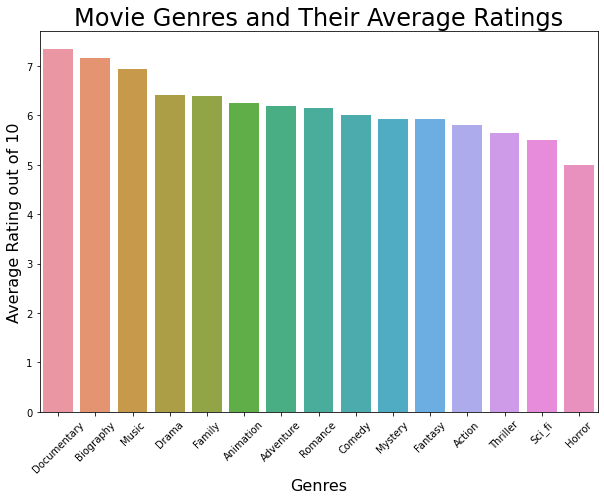

In [50]:
genreDict = {}


docu = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Documentary%'

ORDER BY avgRating DESC

;


'''

docu = pd.read_sql(docu, conn)
documean = docu['avgRating'].mean()
genreDict['Documentary'] = documean


bio = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Biography%'

ORDER BY avgRating DESC

;


'''

bio = pd.read_sql(bio, conn)
biomean = bio['avgRating'].mean()
genreDict['Biography'] = biomean


music = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Music%'

ORDER BY avgRating DESC

;


'''

music = pd.read_sql(music, conn)
musicmean = music['avgRating'].mean()
genreDict['Music'] = musicmean


drama = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Drama%'

ORDER BY avgRating DESC

;


'''

drama = pd.read_sql(drama, conn)
dramamean = drama['avgRating'].mean()
genreDict['Drama'] = dramamean


family = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Family%'

ORDER BY avgRating DESC

;


'''

family = pd.read_sql(family, conn)
familymean = family['avgRating'].mean()
genreDict['Family'] = familymean


ani = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Animation%'

ORDER BY avgRating DESC

;


'''

ani = pd.read_sql(ani, conn)
animean = ani['avgRating'].mean()
genreDict['Animation'] = animean


adv = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Adventure%'

ORDER BY avgRating DESC

;


'''

adv = pd.read_sql(adv, conn)
advmean = adv['avgRating'].mean()
genreDict['Adventure'] = advmean


rom = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Romance%'

ORDER BY avgRating DESC

;


'''

rom = pd.read_sql(rom, conn)
rommean = rom['avgRating'].mean()
genreDict['Romance'] = rommean


com = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Comedy%'

ORDER BY avgRating DESC

;


'''

com = pd.read_sql(com, conn)
commean = com['avgRating'].mean()
genreDict['Comedy'] = commean


mys = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Mystery%'

ORDER BY avgRating DESC

;


'''

mys = pd.read_sql(mys, conn)
mysmean = mys['avgRating'].mean()
genreDict['Mystery'] = mysmean


fant = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Fantasy%'

ORDER BY avgRating DESC

;


'''

fant = pd.read_sql(fant, conn)
fantmean = fant['avgRating'].mean()
genreDict['Fantasy'] = fantmean


action = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Action%'

ORDER BY avgRating DESC

;


'''

action = pd.read_sql(action, conn)
actionmean = action['avgRating'].mean()
genreDict['Action'] = actionmean


thriller = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Thriller%'

ORDER BY avgRating DESC

;


'''

thriller = pd.read_sql(thriller, conn)
thrillermean = thriller['avgRating'].mean()
genreDict['Thriller'] = thrillermean

sci = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Sci-Fi%'

ORDER BY avgRating DESC

;


'''

sci = pd.read_sql(sci, conn)
scimean = sci['avgRating'].mean()
genreDict['Sci_fi'] = scimean


horror = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Horror%'

ORDER BY avgRating DESC

;


'''

horror = pd.read_sql(horror, conn)
horrormean = horror['avgRating'].mean()
genreDict['Horror'] = horrormean
genreDict



genres = list(genreDict.keys())
ratings = list(genreDict.values())


g = sns.barplot(x=genres, y=ratings);
g.figure.set_size_inches(10,7);
g.axes.set_title('Movie Genres and Their Average Ratings', fontsize=24);
plt.xticks(rotation=45);
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Average Rating out of 10', fontsize=16);

# Movie Genres and Their Average Ratings
####    The graph above shows a list of movie genres and the average ratings movies in those genres tend to recieve. The highest average rating belongs to the Documentary genre, averaging a 7.33/10, while the lowest average rating of 5/10 belongs to the Horror genre. The top three genres for ratings are Documentary, Bioography, and Music, and the three lowest rated genres are Action, Sci-Fi, and Horror. 

#### This model demonstrates the average public perception of movies in different genres. Documentaries tend to be percieved the best, while Horror films tend to face more harsh criticism. Rating effects the number of people who will want to view the film, in turn p changing how successful the film can be.

#### The results shown reach across a large variety of data, returning an overall sense of how good films in different genres are, according to consumer opinion.

#### This data is good to take into account because when a movie has lower ratings, less people will be willing to see it based on their first impressions of it. A bad rating can heavily impact the numbers of views the film reaches. 

###### Nicolas Pierce

True

In [52]:
#avgGenreRatings = {'Documentary' : 7.33, 'Comedy': 6.00, 'Drama': 6.40,
#                   'Fantasy': 5.91, 'Family': 6.39, 'Romance': 6.14,
#                  'Mystery': 5.92, 'Horror': 5, 'Action': 5.81,
#                  'Sci-Fi': 5.48, 'Adventure': 6.19, 'Animation': 6.24,
#                  'Biography': 7.16, 'Music': 6.93}


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [51]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***